# Data Visualization with `ggplot2`

In [211]:
library(ggplot2)
library(dplyr)

`ggplot2` builds charts through layers using `geom_` functions. Here is a list of the different available geoms (geometric objects). 

In [3]:
# list of all geoms
ls(pattern = '^geom_', env = as.environment('package:ggplot2'))

[1] "geom_abline"            "geom_area"              "geom_bar"              
 [4] "geom_bin2d"             "geom_blank"             "geom_boxplot"          
 [7] "geom_col"               "geom_contour"           "geom_contour_filled"   
[10] "geom_count"             "geom_crossbar"          "geom_curve"            
[13] "geom_density"           "geom_density_2d"        "geom_density_2d_filled"
[16] "geom_density2d"         "geom_density2d_filled"  "geom_dotplot"          
[19] "geom_errorbar"          "geom_errorbarh"         "geom_freqpoly"         
[22] "geom_function"          "geom_hex"               "geom_histogram"        
[25] "geom_hline"             "geom_jitter"            "geom_label"            
[28] "geom_line"              "geom_linerange"         "geom_map"              
[31] "geom_path"              "geom_point"             "geom_pointrange"       
[34] "geom_polygon"           "geom_qq"                "geom_qq_line"          
[37] "geom_quantile"          "geom_raster"            "geom_rect"             
[40] "geom_ribbon"            "geom_rug"               "geom_segment"          
[43] "geom_sf"                "geom_sf_label"          "geom_sf_text"          
[46] "geom_smooth"            "geom_spoke"             "geom_step"             
[49] "geom_text"              "geom_tile"              "geom_violin"           
[52] "geom_vline"

### Scatter Plots

A scatterplot displays the relationship between two *numerical* variables. It shows the relationship between them, eventually revealing a correlation. It is often accompanied by a correlation coefficient calculation, that usually tries to measure the linear relationship. Non-linear model fitting can also be done. We'll get to estimating linear relationships (aka "linear regression") later in the Statistics module.  

Below the relationship between Black cherry tree girth and length is shown.

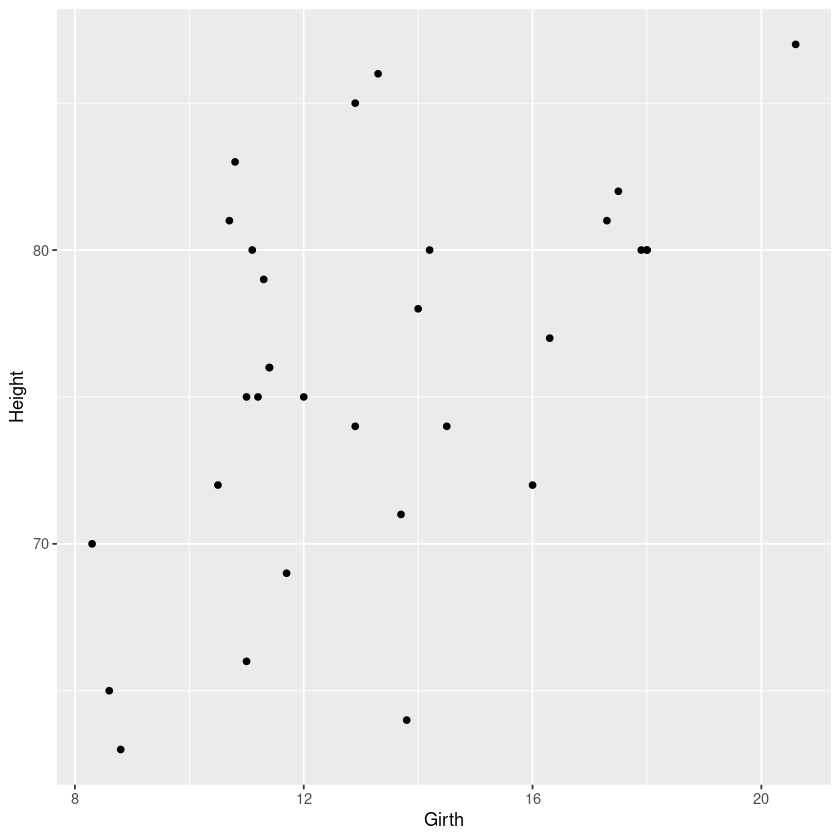

In [8]:
# basic scatterplot
## geom_point() gives us the scatter plot
ggplot(trees, aes(x=Girth, y=Height)) + 
    geom_point()

### Bar Plots

A bar graph is a chart that graphically represents the comparison between categories of data. It displays grouped data by way of parallel rectangular bars of equal width but varying the length. Each rectangular block indicates a specific category and the length of the bars depends on the values they hold. The bars in a bar graph are presented in such a way that they do not touch each other, to indicate elements as separate entities.

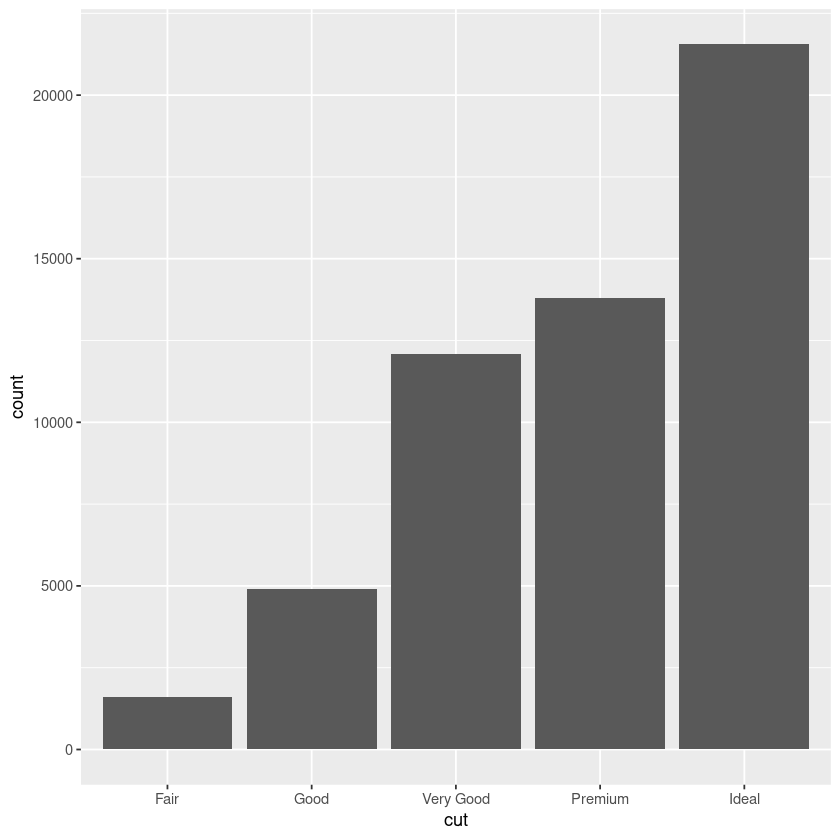

In [67]:
# basic bar plot
## prices of over 50,000 round cut diamonds

ggplot(diamonds, aes(cut)) +
    geom_bar()

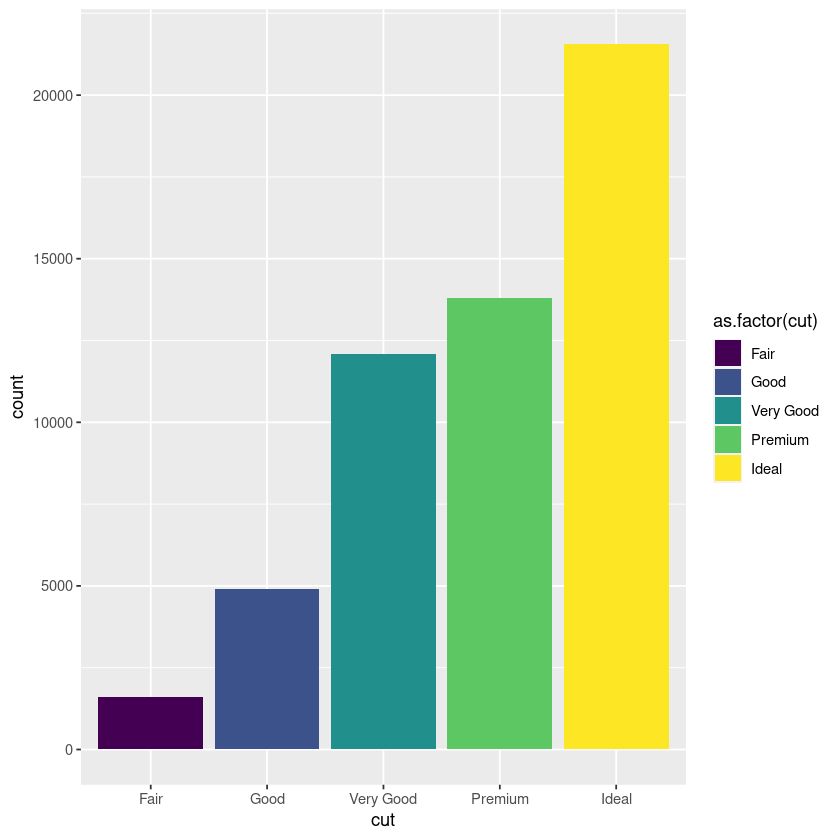

In [69]:
# color coding

ggplot(diamonds, aes(x = cut, fill= cut)) +
    geom_bar()

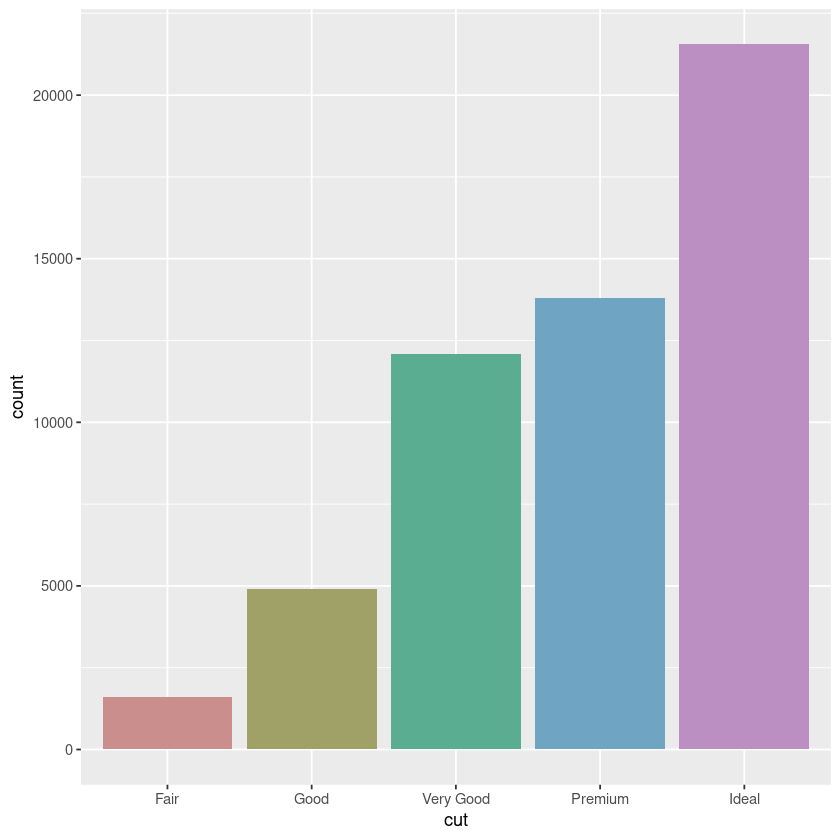

In [74]:
# lots of flexibility in coloring
# playing with hues; `c` argument is for chroma (intensity of color)
# theme - can control axes, background, and legends

ggplot(diamonds, aes(x = cut, fill = cut)) +
    geom_bar() + scale_fill_hue(c = 40) + theme(legend.position="none")

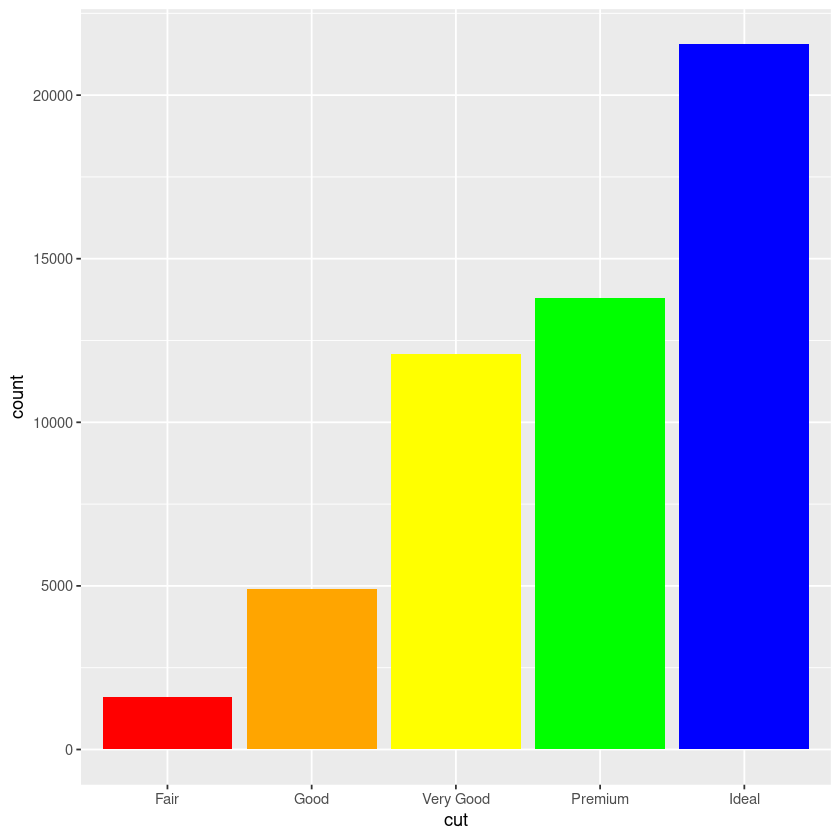

In [78]:
ggplot(diamonds, aes(x = cut, fill = cut)) +
    geom_bar() + scale_fill_manual(values = c("red", "orange", "yellow", "green", "blue")) + 
    theme(legend.position="none")

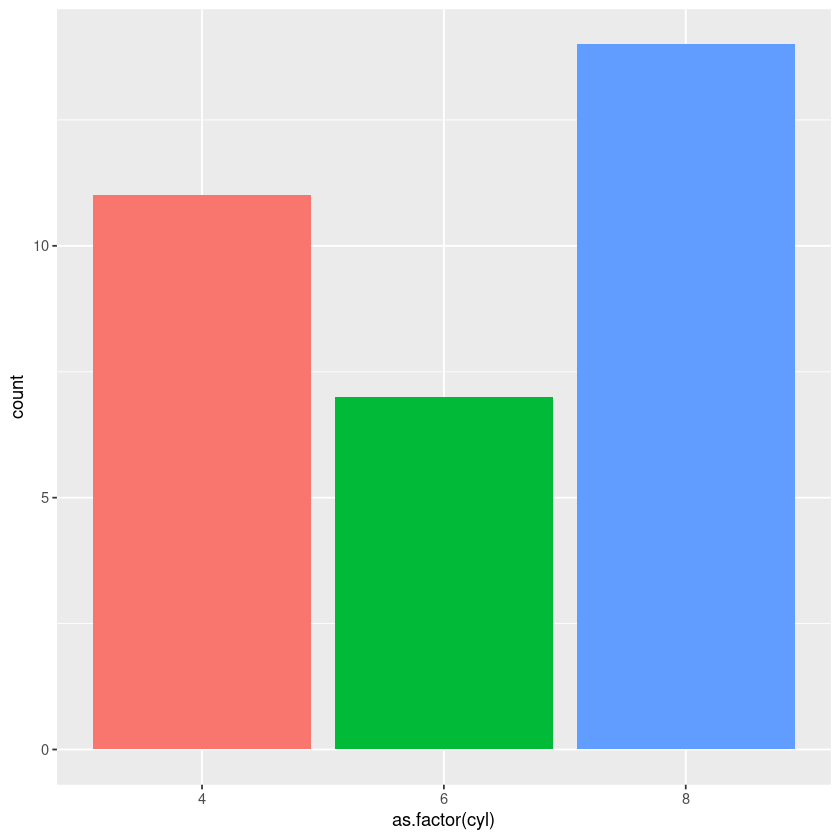

In [82]:
# can also turn numerical values into categorical data by using `as.factor`

ggplot(mtcars, aes(x=as.factor(cyl), fill = as.factor(cyl))) +
    geom_bar() + theme(legend.position="none")

### Histograms

A histogram is defined as a type of bar chart that is used to represent statistical information by way of bars to show the frequency distribution of continuous (numerical) data. It indicates the number of observations which lie in-between the range of values, known as class or bin. The histogram is drawn in such a way that there is no gap between the bars.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



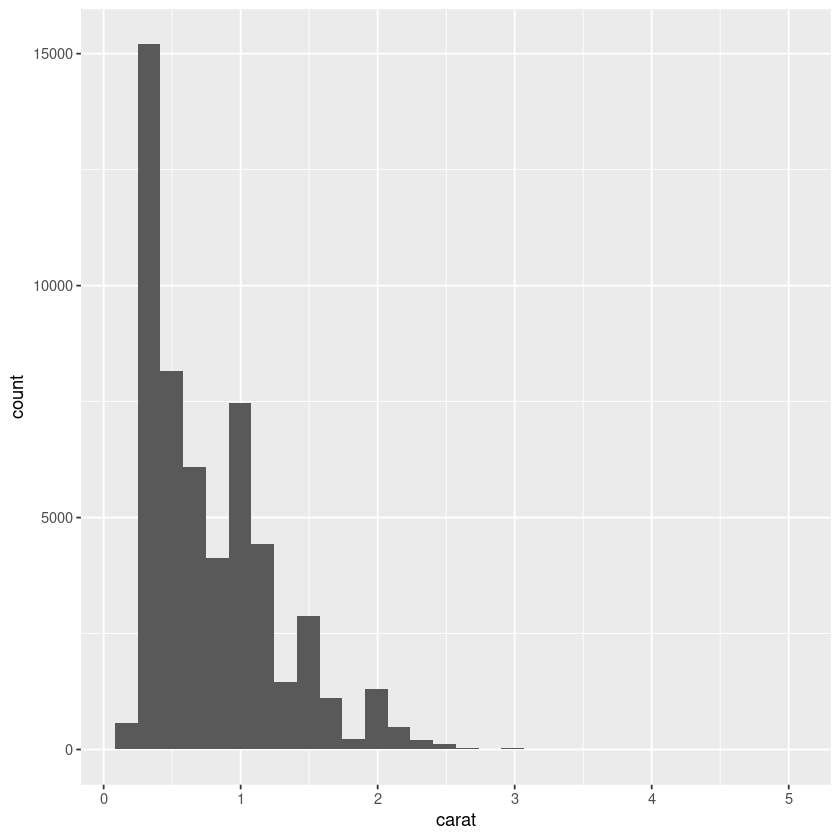

In [50]:
# basic histogram
## prices of over 50,000 round cut diamonds
ggplot(diamonds, aes(carat)) +
     geom_histogram()

Note that a warning message is triggered with this code: we need to take care of the bin width. A histogram takes as input a numeric variable and cuts it into several bins. Playing with the bin size is a very important step, since its value can have a big impact on the histogram appearance and thus on the message you’re trying to convey.

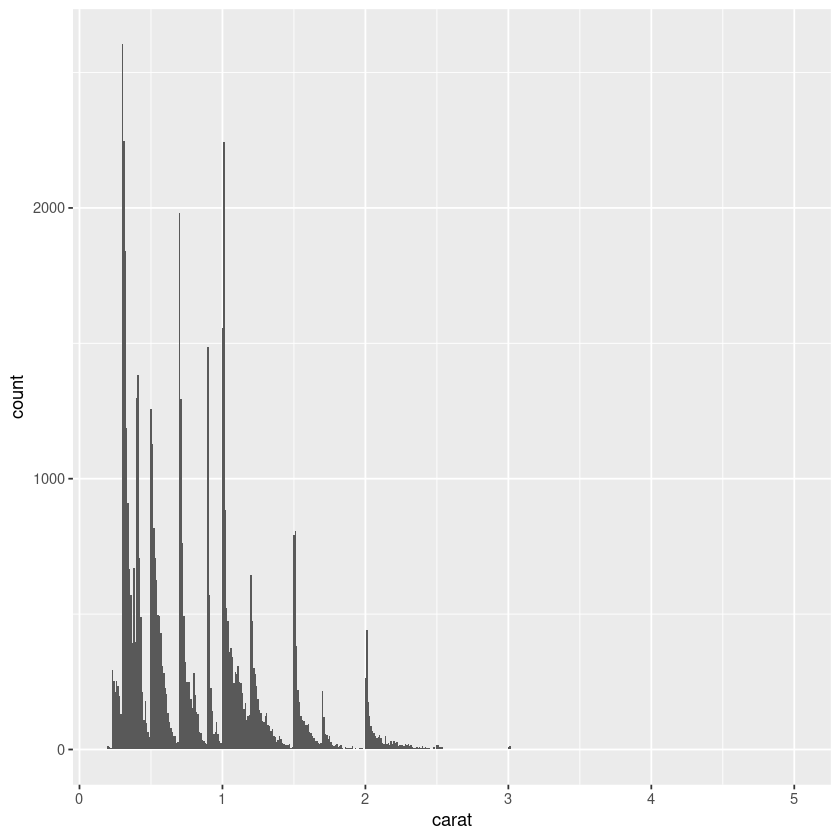

In [51]:
# play around with the binwidth to see how it affects the plots

ggplot(diamonds, aes(carat)) +
     geom_histogram(binwidth = 0.01)

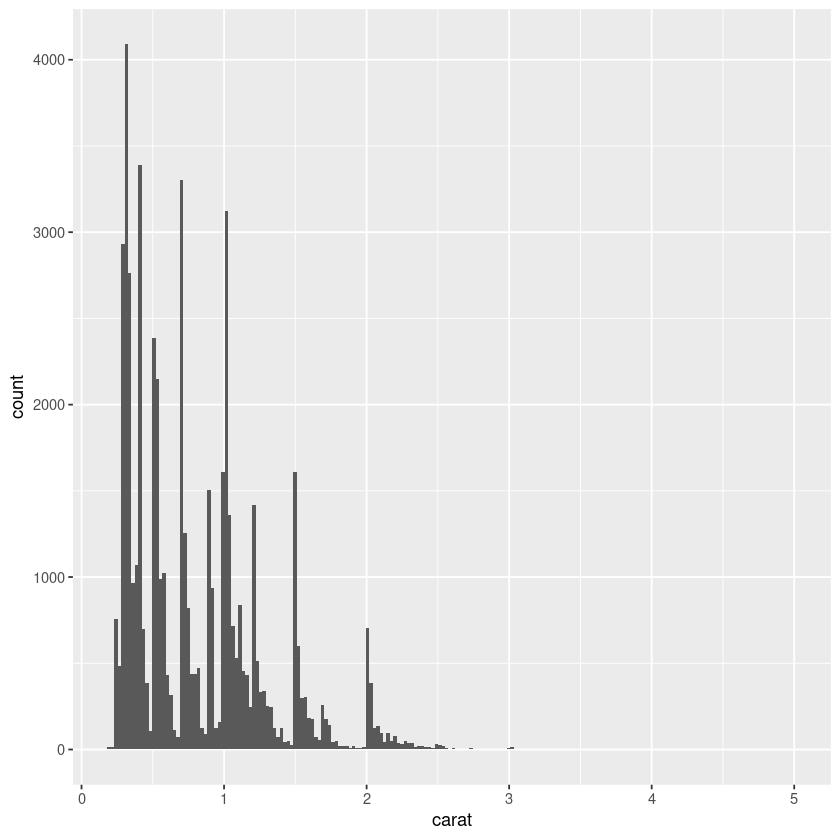

In [55]:
# changing number of bins directly

ggplot(diamonds, aes(carat)) +
     geom_histogram(bins = 200)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



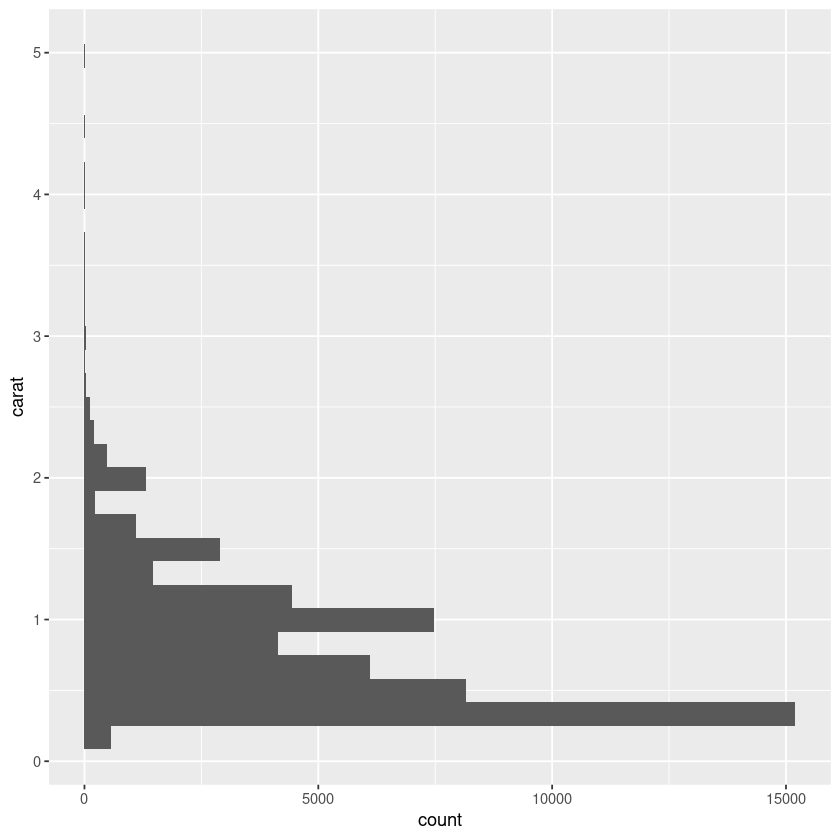

In [56]:
# flip axes

ggplot(diamonds, aes(y = carat)) +
  geom_histogram()


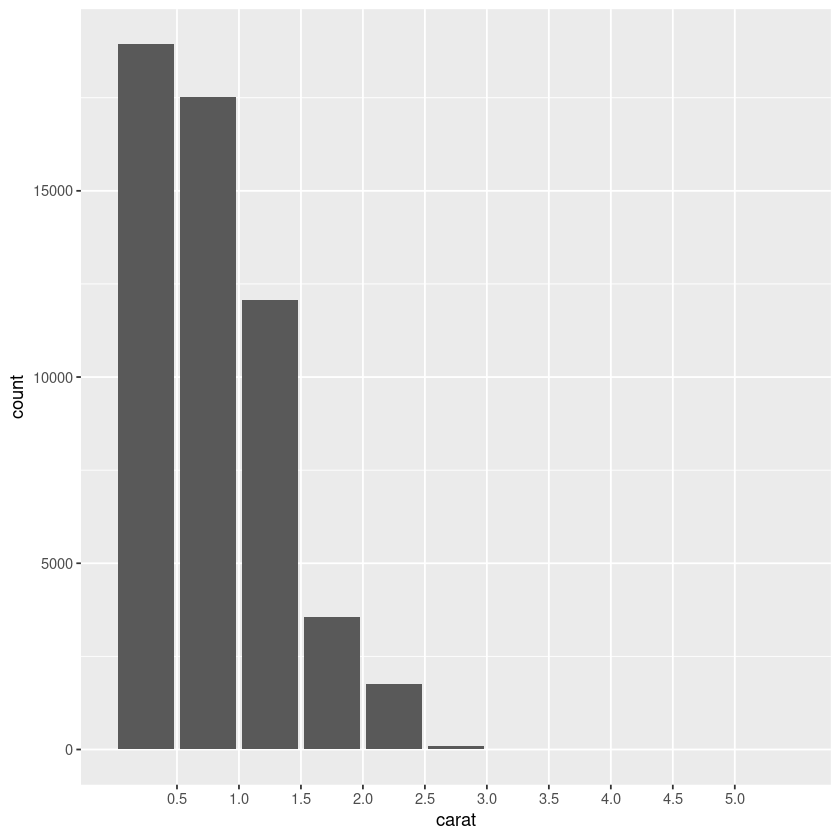

In [59]:
# for histograms with tick marks between each bin, use `geom_bar` with `scale_x_binned`

ggplot(diamonds, aes(carat)) +
  geom_bar() +
  scale_x_binned()

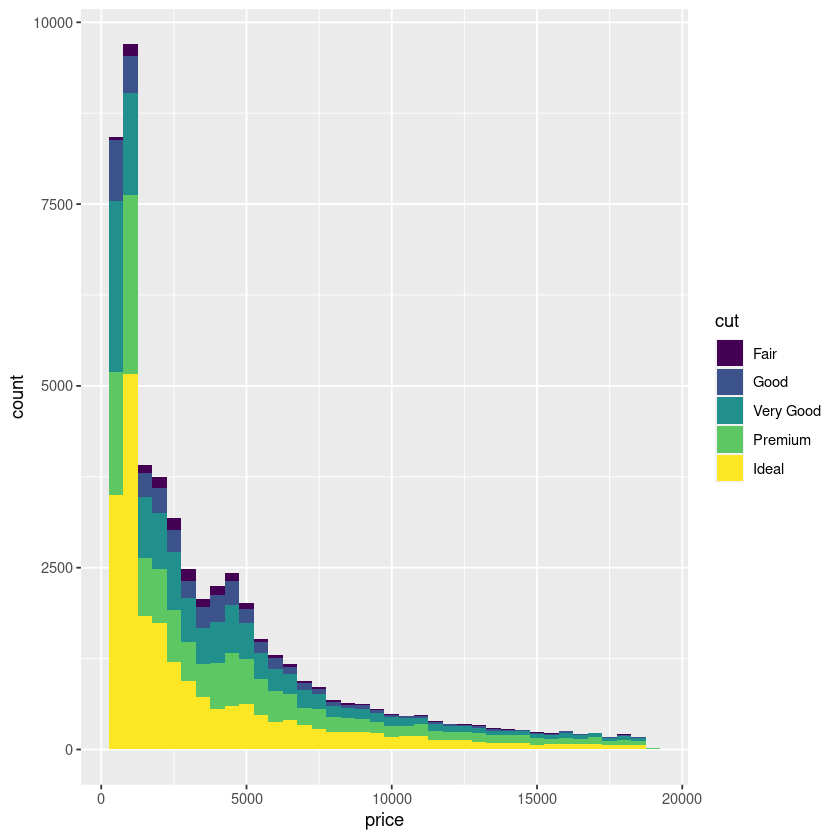

In [60]:
# color coding & stacking histograms

ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500)

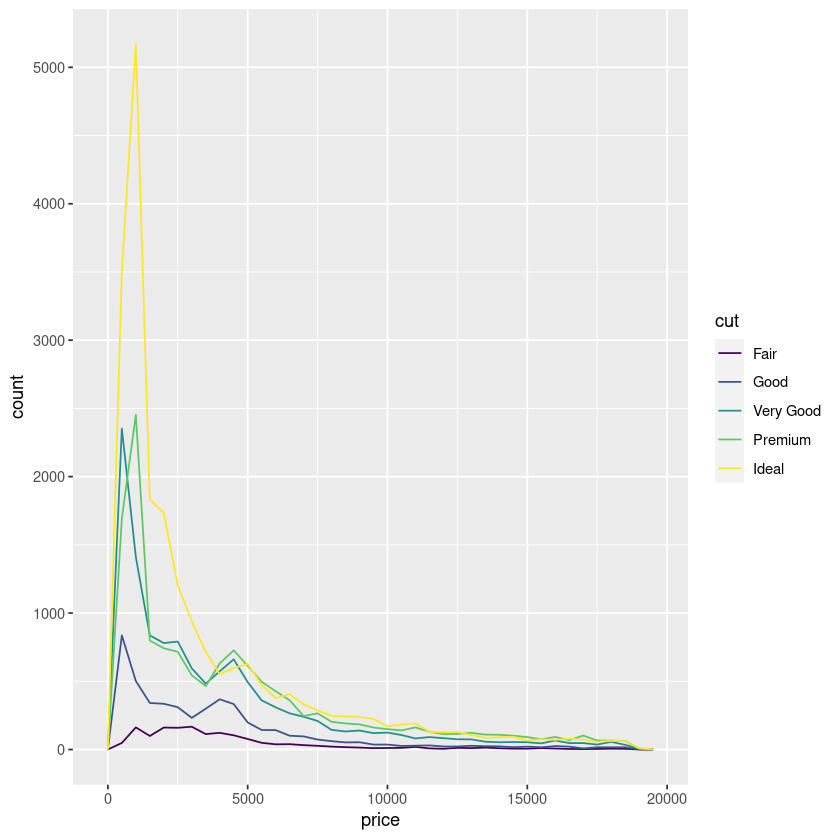

In [63]:
# sometimes instead of stacking histograms, it's easier to compare frequency polygons

ggplot(diamonds, aes(price, colour = cut)) +
  geom_freqpoly(binwidth = 500)


### Boxplots

A boxplot summarizes the distribution of a continuous variable. It displays its median, its first and third quartiles and its outliers. Main caveat is that the underlying distribution is hidden.

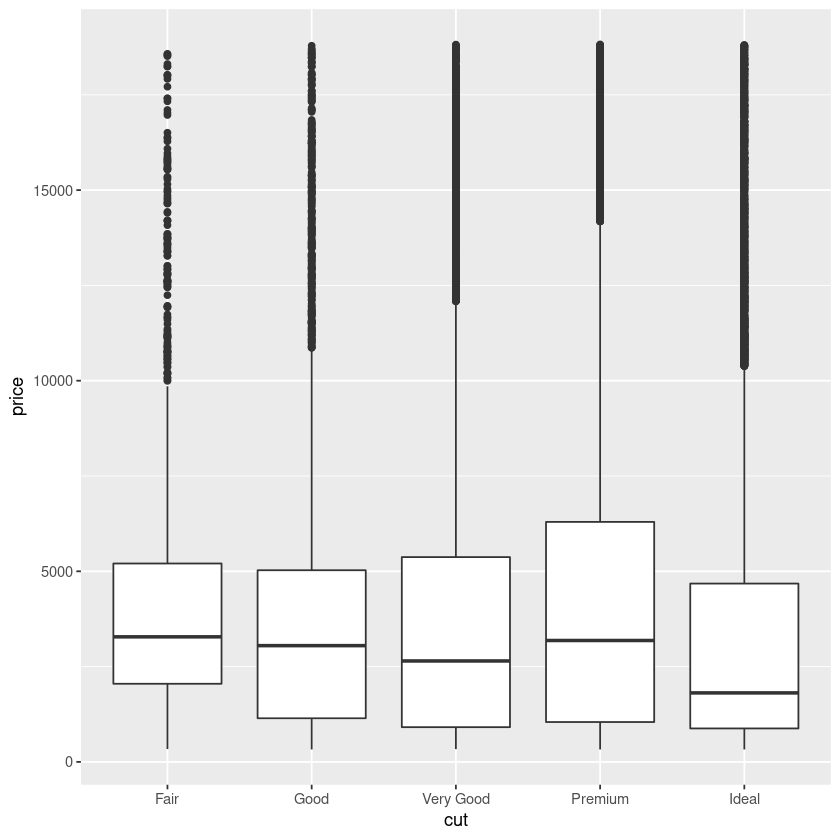

In [83]:
ggplot(diamonds, aes(x=cut, y=price)) +
    geom_boxplot()

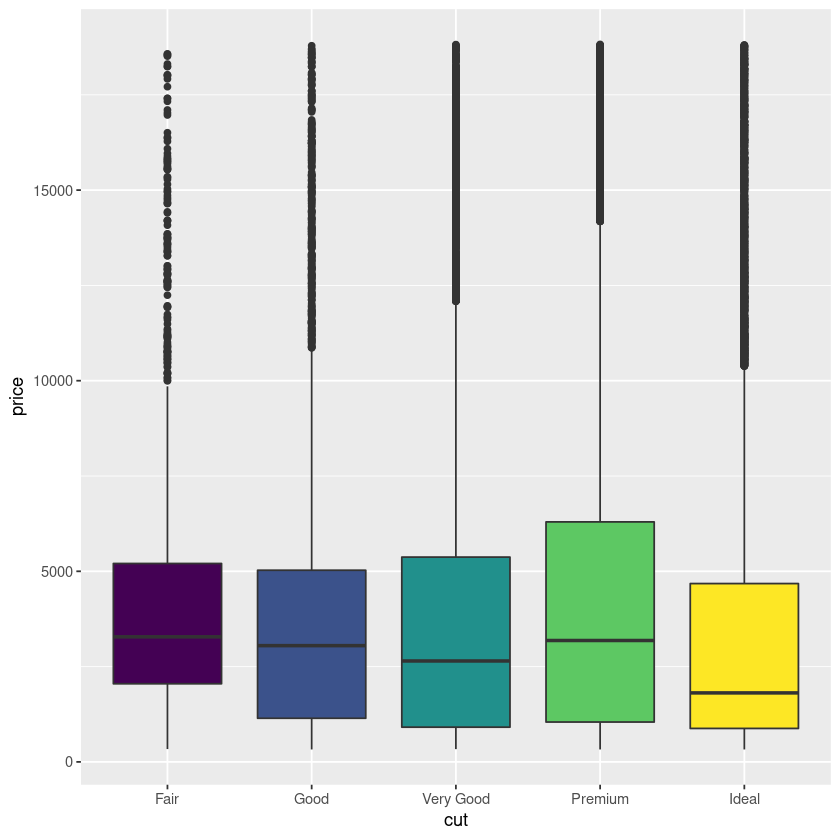

In [85]:
ggplot(diamonds, aes(x=cut, y=price, fill = cut)) +
    geom_boxplot() + theme(legend.position="none")

In [168]:
# highlight a category

# prepare data
data <- mutate(diamonds, type=ifelse(cut=="Premium","Highlighted","Normal"))

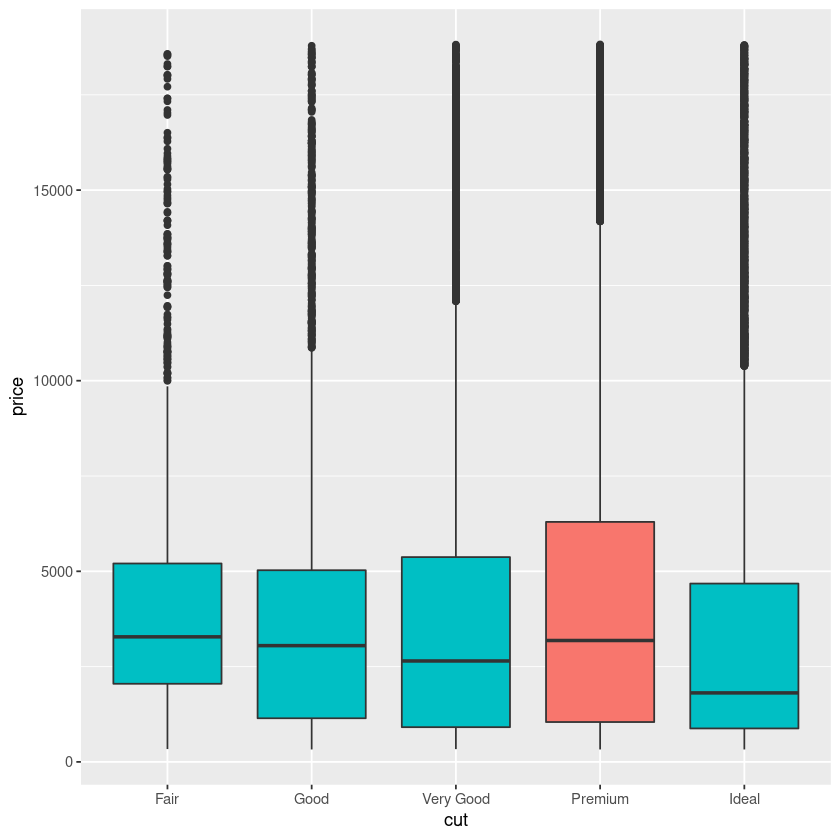

In [141]:
ggplot(data, aes(x=cut, y=price, fill = type)) +
    geom_boxplot() + theme(legend.position="none")

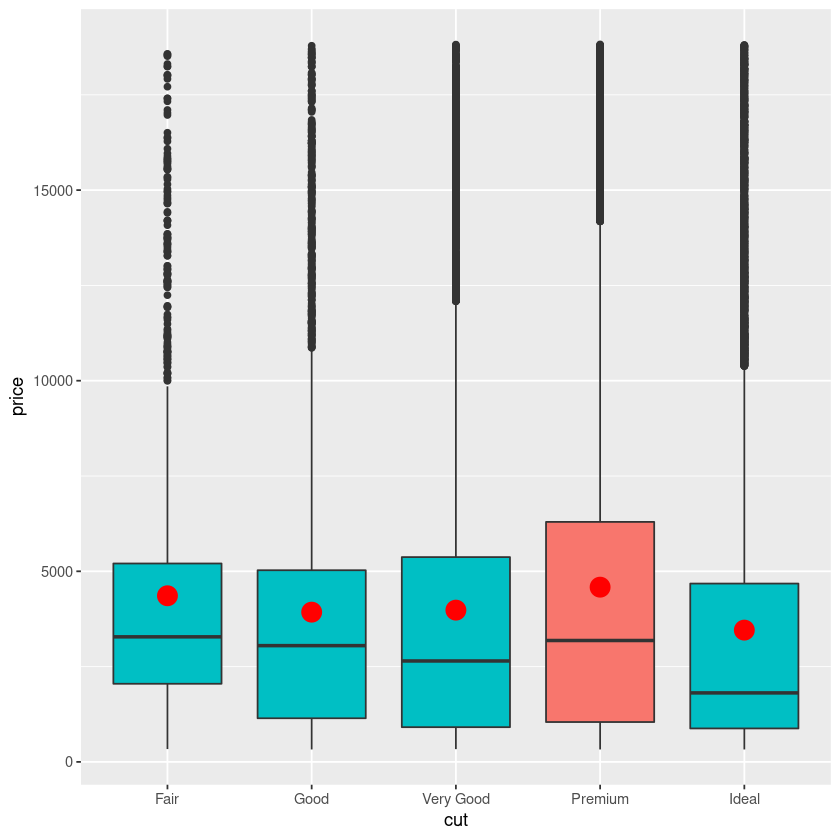

In [169]:
# adding the mean point

ggplot(data, aes(x=cut, y=price, fill = type)) +
    geom_boxplot() + theme(legend.position="none") +
    stat_summary(fun=mean, geom="point", shape=20, size=8, color="red")

##### Grouped Boxplot

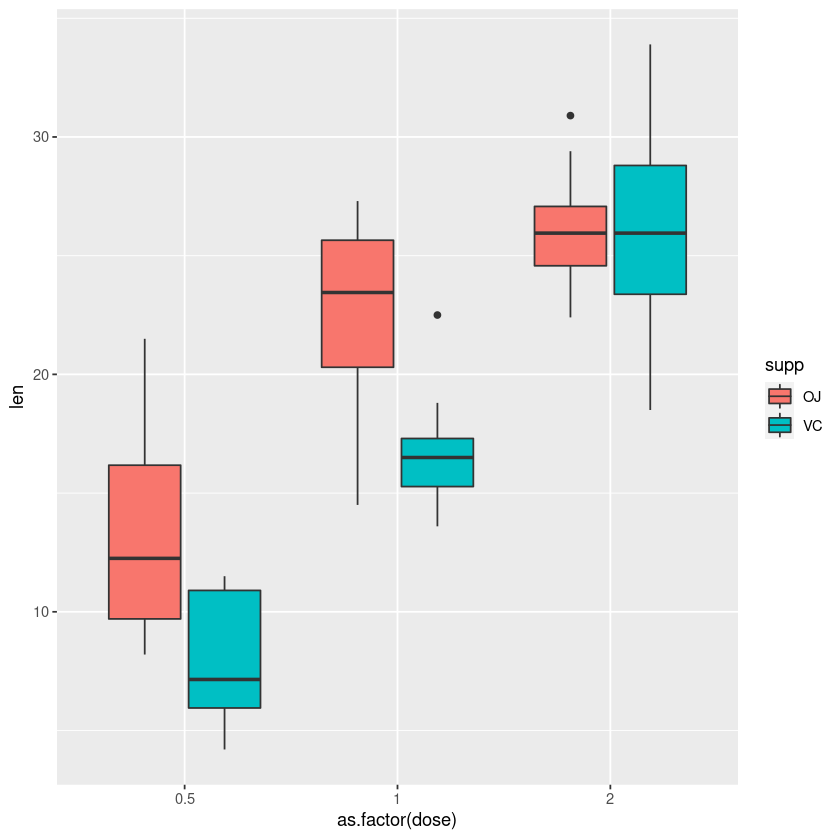

In [152]:
# grouped boxplot
# the effect of vitamin C on tooth growth in guinea pigs; each pig received one of three doses of vitamin C, through 
# one of two delivery methods (orange juice or ascorbic acid)

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() 

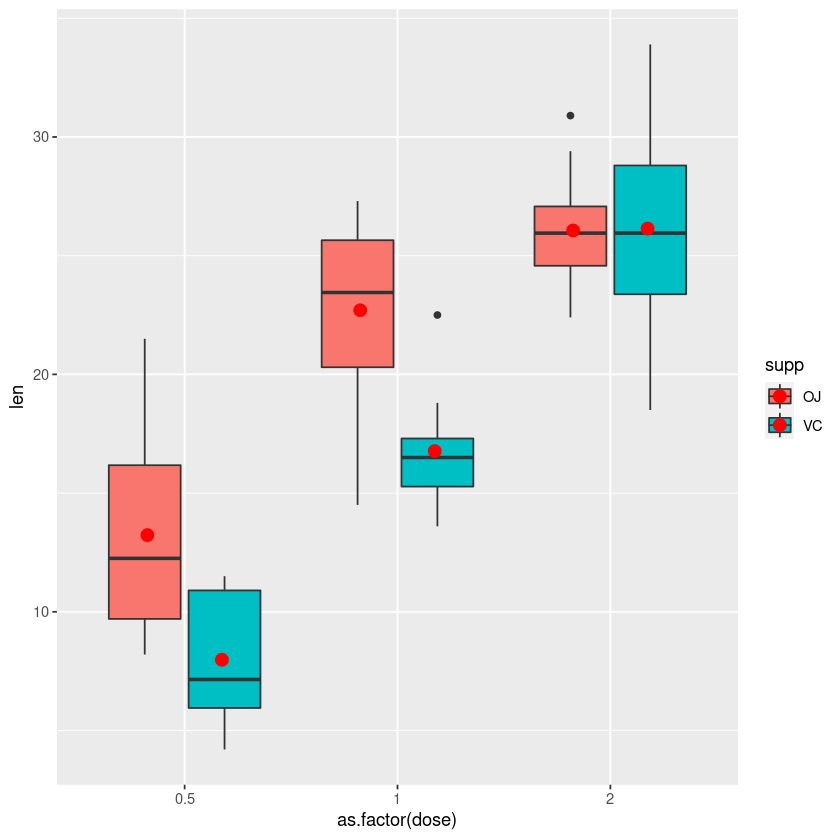

In [166]:
# with mean points

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + 
    stat_summary(fun=mean, aes(group = supp), geom="point", 
                 position=position_dodge(width=0.7), shape=20, size=5, color="red")

##### Faceting
Faceting is the process that splist the chart window into several small parts (a grid), and displays a similar chart in each section. Each section usually shows the same graph for a specific group of the dataset. The result is usually called a "small multiple".

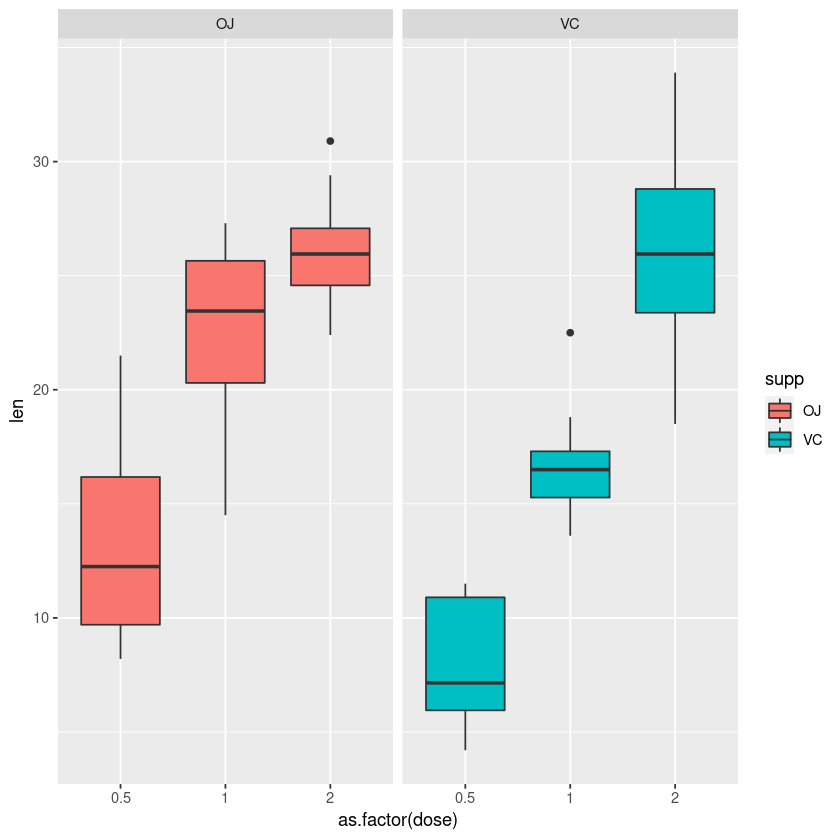

In [106]:
# faceting; one box per delivery method

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + facet_wrap(~supp)


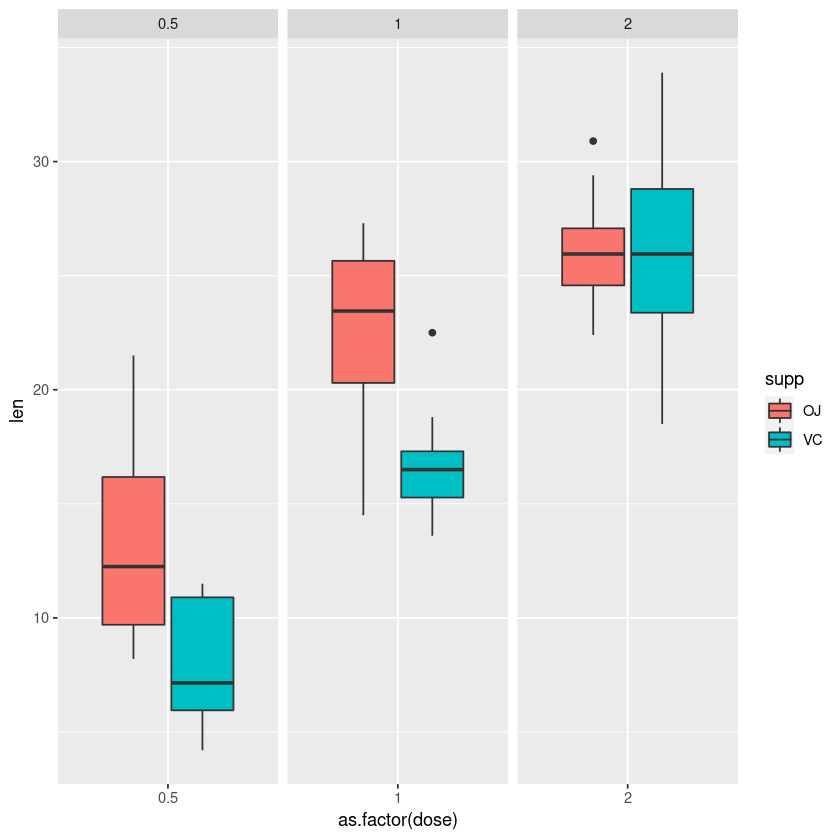

In [105]:
# faceting; one box per dose type

ggplot(ToothGrowth, aes(x=as.factor(dose), y=len, fill = supp)) +
    geom_boxplot() + facet_wrap(~as.factor(dose), scale="free_x")

##### With jitter

As mentioned above, boxplots, though useful, hide the underlying distribution of each group. We can display individual observations by using `geom_jitter`.

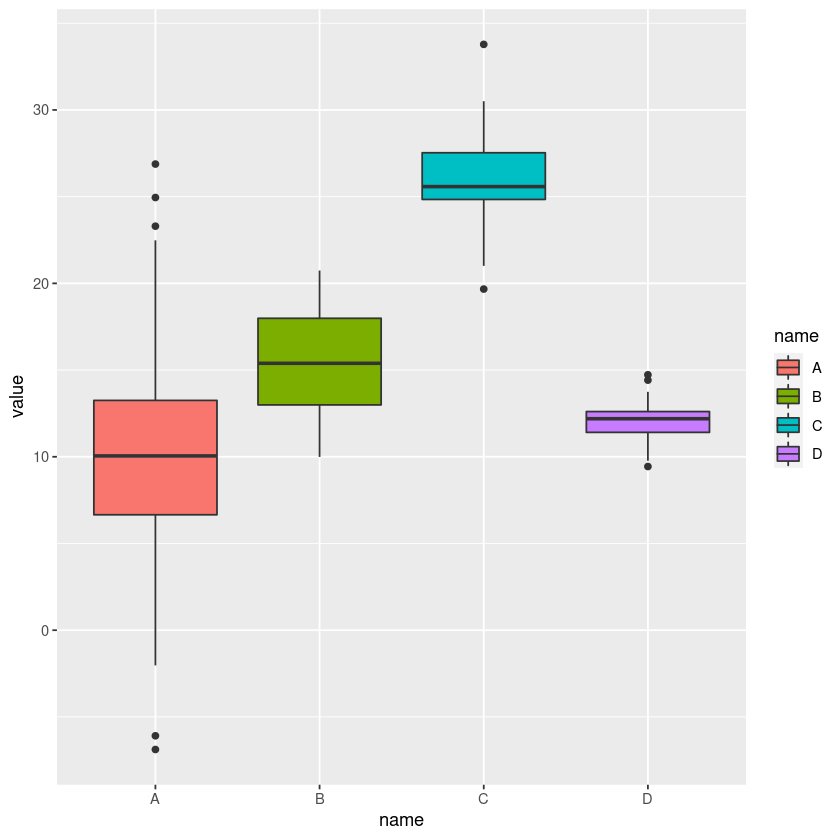

In [159]:
# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# plot basic boxplot
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_boxplot() 

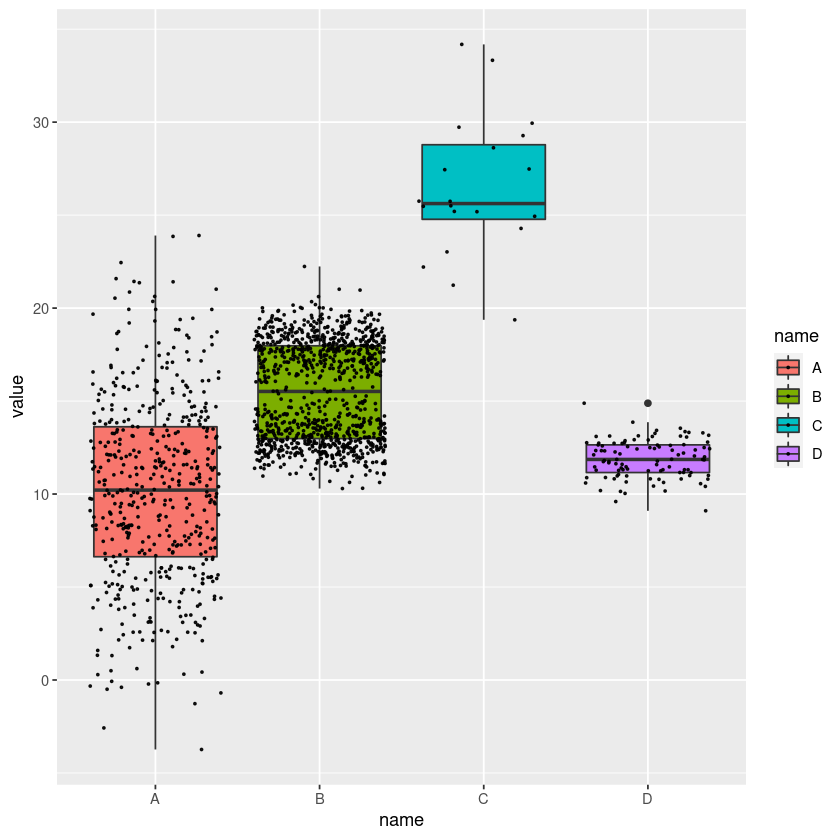

In [130]:
# plot boxplot with jitter
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_boxplot() +
    geom_jitter(color="black", size=0.4, alpha=0.9)

### Violin Plots

Another way solution to the pitfall of boxplots is visualizing violin plots. A violin plot allows to compare the distribution of several groups by displaying their densities. The shape represents the density estimate of the variable: the more data points in a specific range, the larger the violin is for that range.

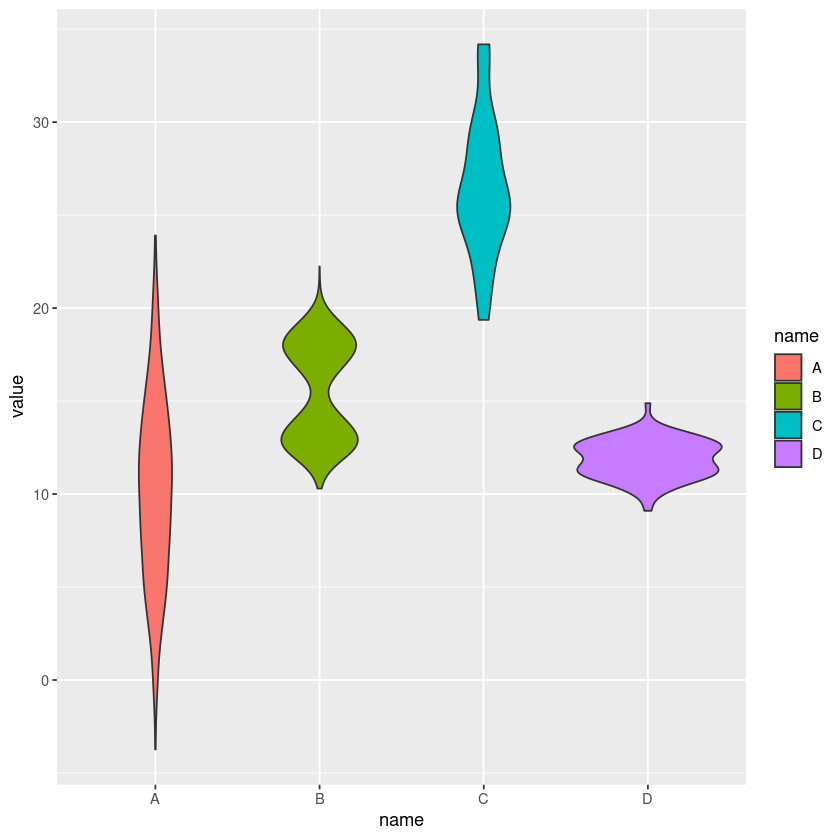

In [132]:
ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_violin() 

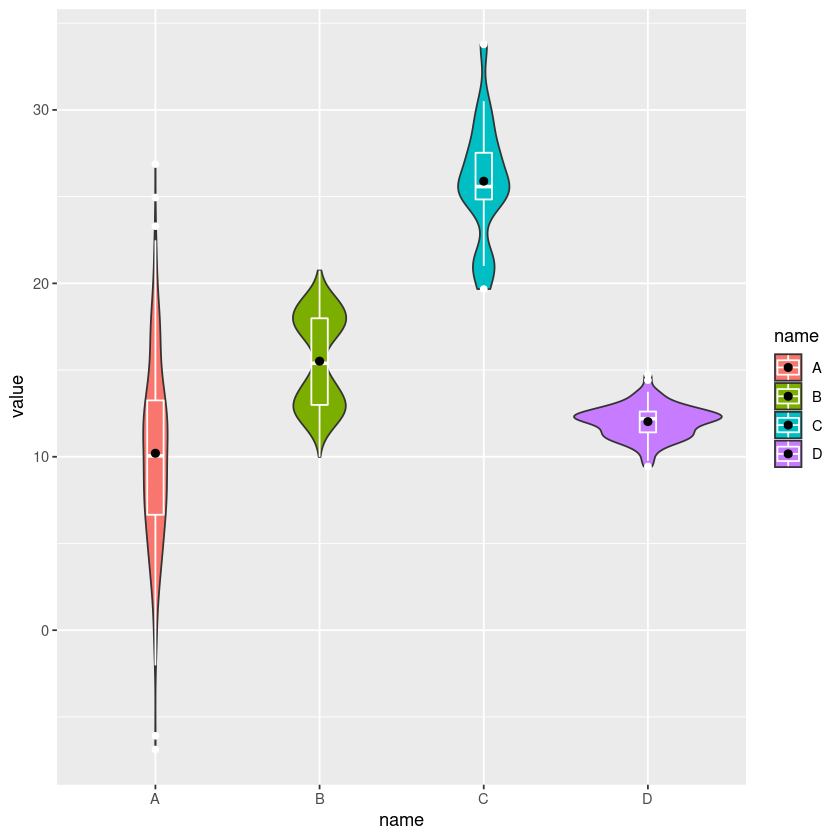

In [165]:
# overlap boxplot and violins

ggplot(data, aes(x=name, y=value, fill=name)) +
    geom_violin() + geom_boxplot(width=0.1, color="white") +
    stat_summary(fun=mean, geom="point", shape=20, size=3, color="black")

## Annotation

### Point labels

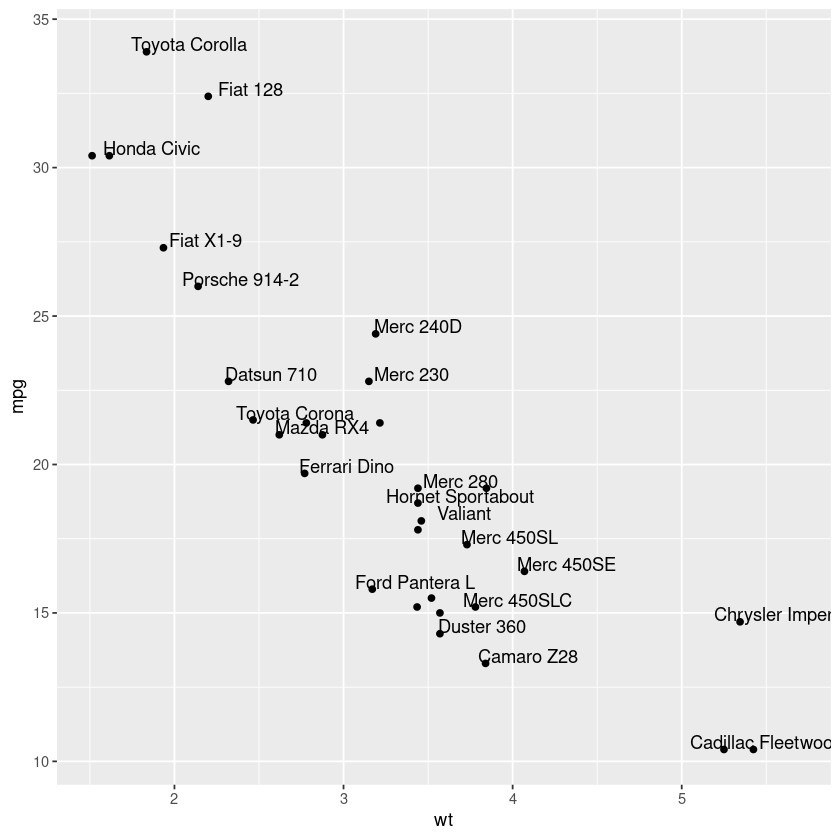

In [178]:
# using geom_text() to apply text labels to points

ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + 
  geom_text(
      label=rownames(mtcars),
      nudge_x = 0.25, nudge_y = 0.25, 
      check_overlap = T
  )

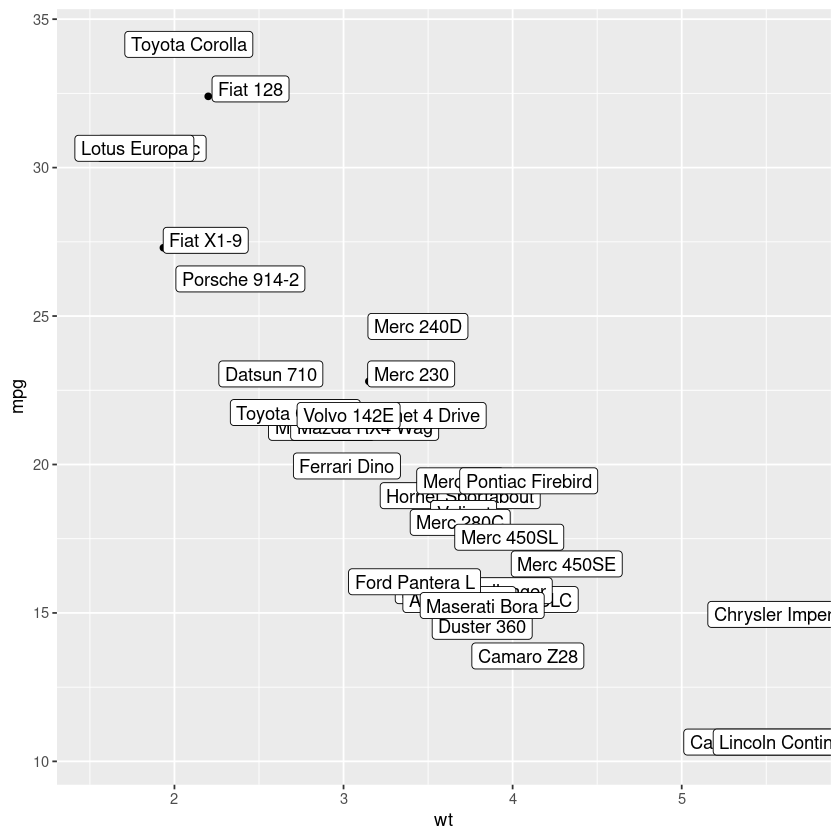

In [184]:
# using geom_label() to apply text labels to points

ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + 
  geom_label(
      label=rownames(mtcars),
      nudge_x = 0.25, nudge_y = 0.25
  )

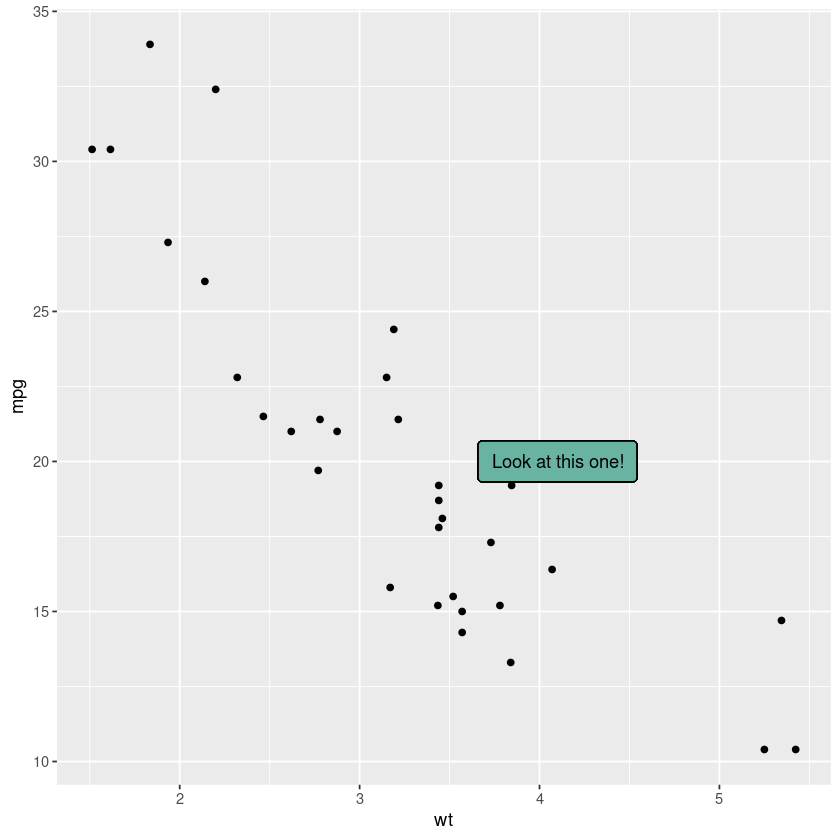

In [176]:
# add one annotation

ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + # Show dots
  geom_label(
    label="Look at this one!", 
    x=4.1,
    y=20,
    label.padding = unit(0.55, "lines"), # Rectangle size around label
    label.size = 0.35,
    color = "black",
    fill="#69b3a2"
  )

### Shapes

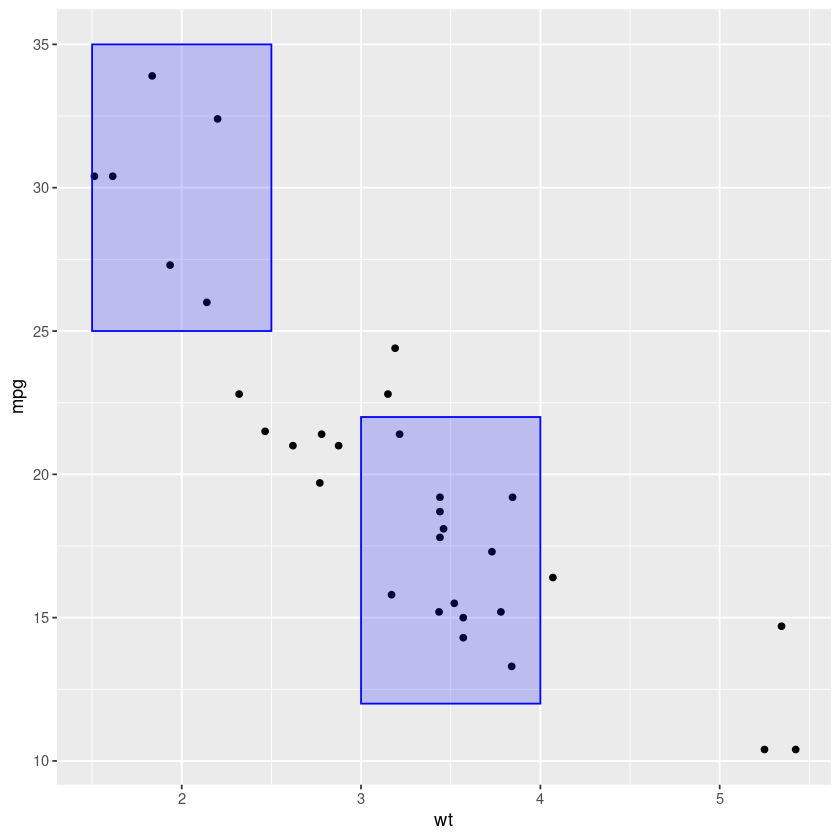

In [192]:
# rectangles

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    annotate("rect", xmin=c(1.5,3), xmax=c(2.5,4), ymin=c(25,12) , ymax=c(35,22), alpha=0.2, color="blue", fill="blue")

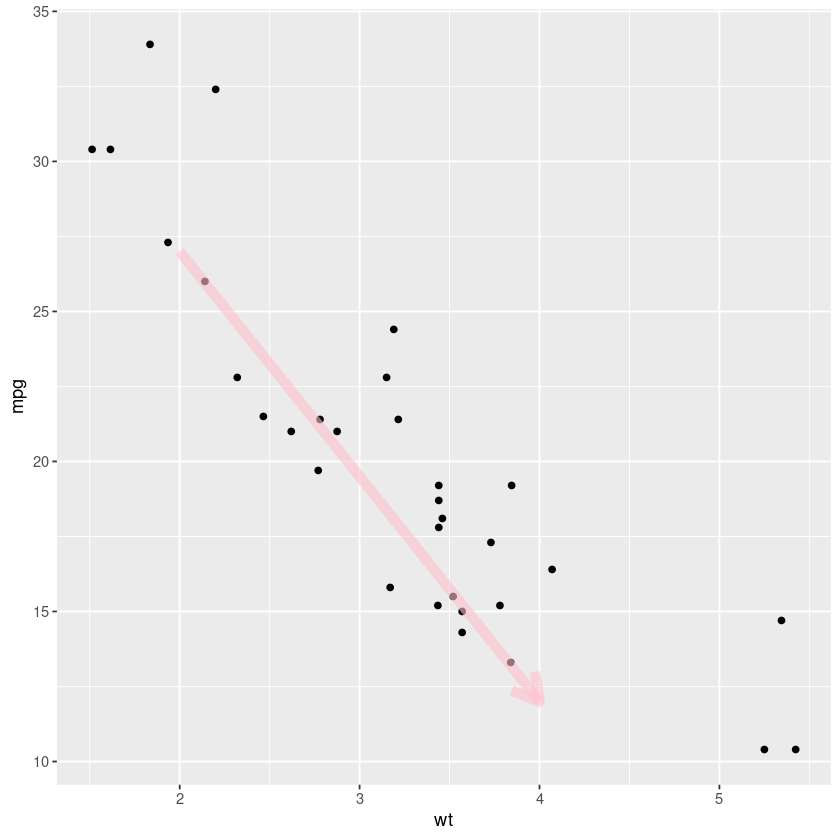

In [198]:
# segments/arrows

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    annotate("segment", x = 2, xend = 4, y = 27, yend = 12, colour = "pink", size=3, alpha=0.6, arrow=arrow())

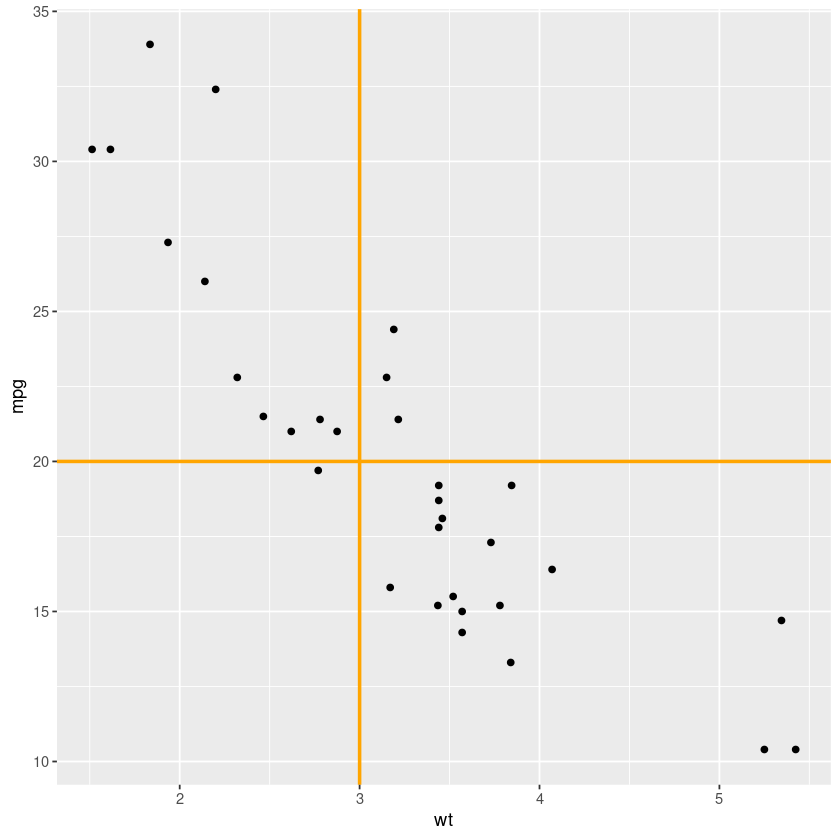

In [200]:
# gridlines

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    # horizontal
    geom_hline(yintercept=20, color="orange", size=1) + 
    # vertical
    geom_vline(xintercept=3, color="orange", size=1)

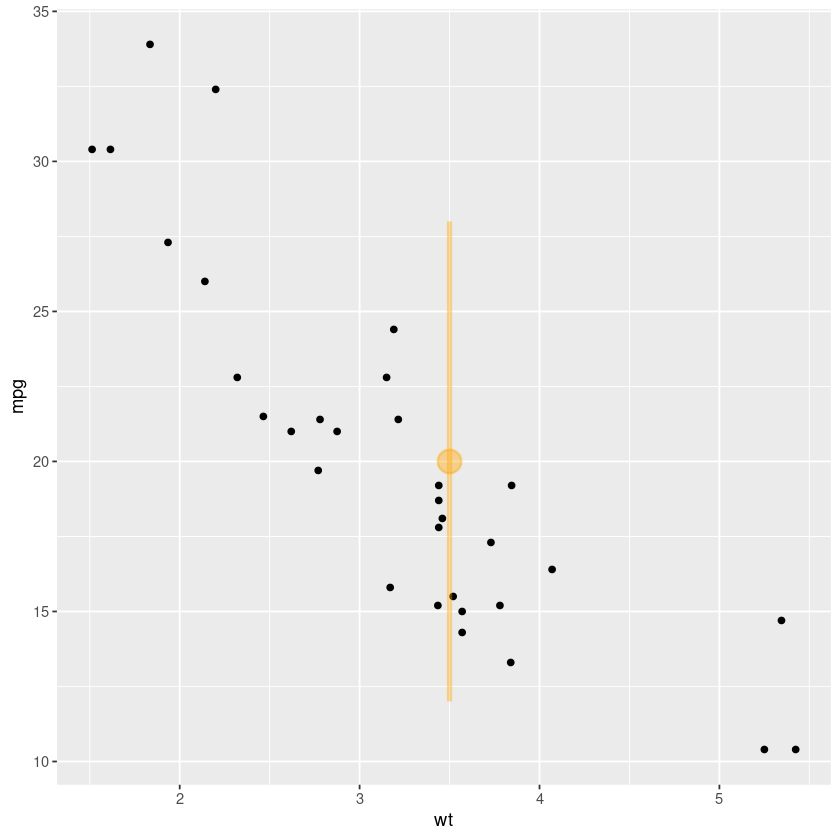

In [202]:
# point w/ range
ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() +
    annotate("pointrange", x = 3.5, y = 20, ymin = 12, ymax = 28,colour = "orange", size = 1.5, alpha=0.4)


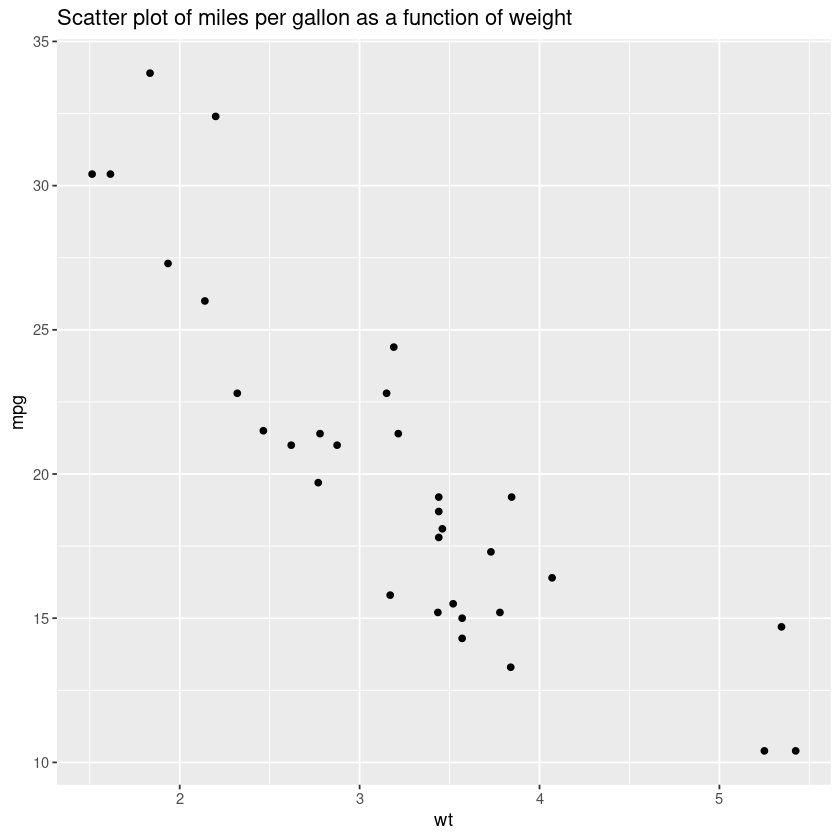

In [203]:
# title manipulation

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() + ggtitle("Scatter plot of miles per gallon as a function of weight")

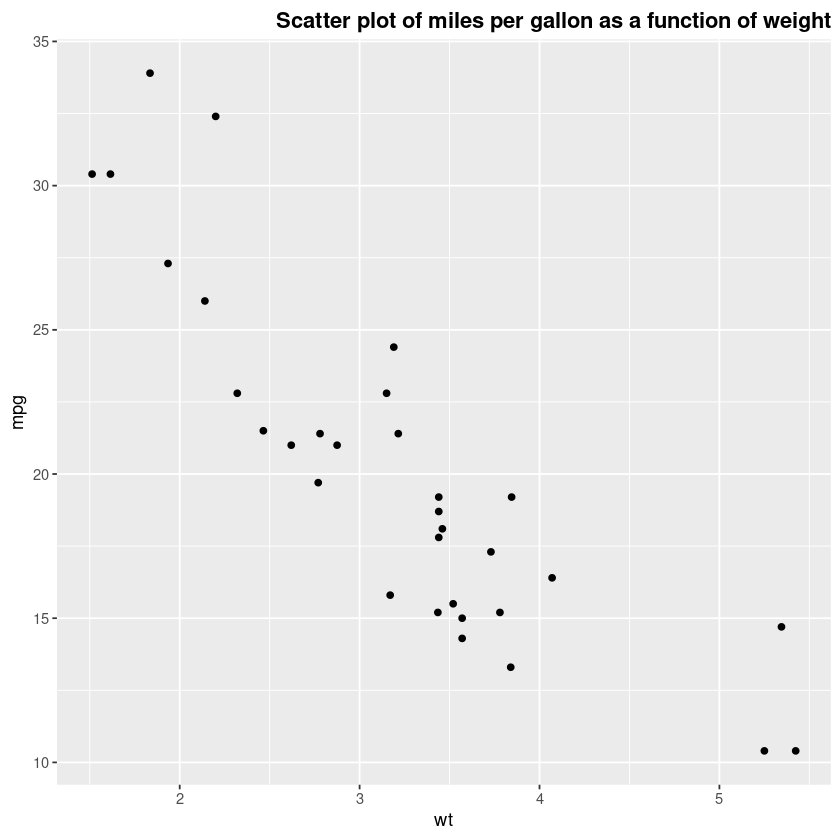

In [205]:
# adjusting title with theme()

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() + ggtitle("Scatter plot of miles per gallon as a function of weight") +
    theme(plot.title=element_text( hjust=1, vjust=0.5, face='bold'))

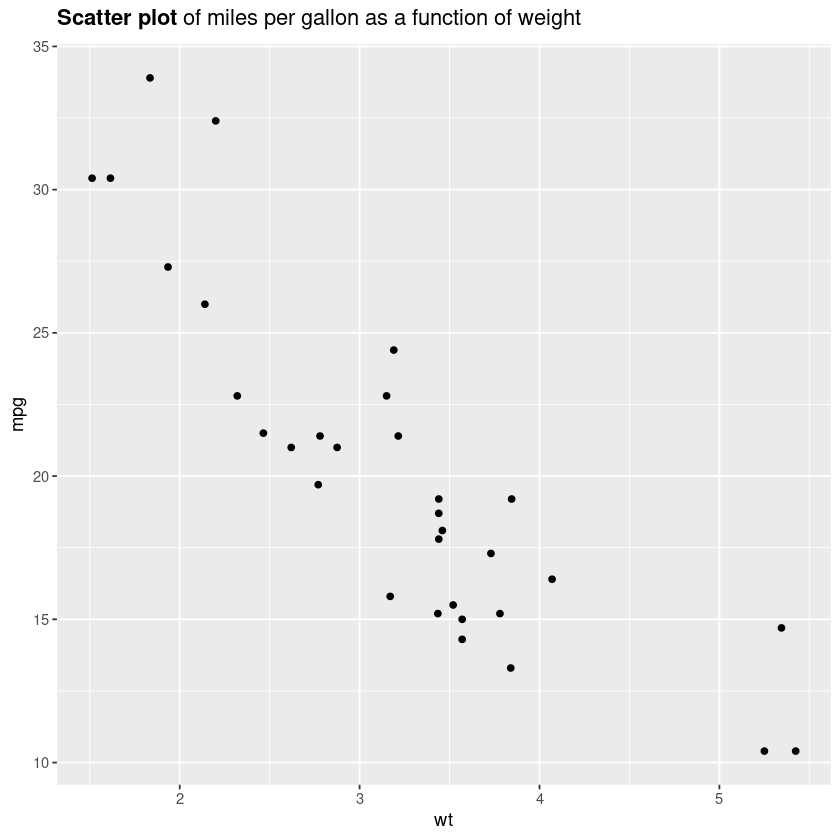

In [209]:
# customizing a word

my_title <- expression(paste(italic(bold("Scatter plot"))," of miles per gallon as a function of weight"))

ggplot(mtcars, aes(x=wt, y=mpg)) +
    geom_point() + ggtitle(my_title)

## Interactive Plots

In [ ]:
p <- ggplot(mtcars, aes(x=wt, y=mpg)) +
  geom_point() + 
  geom_text(
      label=rownames(mtcars),
      nudge_x = 0.25, nudge_y = 0.25, 
      check_overlap = T
  )

ggplotly(p)

## Questions

* You assign 100 UCB students to 5 groups, and each group receives a unique variation of an exam from the same class. You want to visualize your data to see if there might be a particular variation that has a higher rate of success. What plot might you use?


* A series of hourly temperatures were measured throughout the day in degrees Fahrenheit. You want to visualize some simple summary statistics to get a basic understanding of the underlying distribution of temperature. What plot might you use?


* You receive data over the next 3 months for both temperature and humidity, and want to understand the relationship between the two. What plot might you use to visualize the relationship?



* You receive human traffic data for randomly sampled days throughout the year from the San Francisco International Airport. You want to calculate the probabilty that on any particular day, there are $X$ amount of people that arrive at the airport per hour. What plot might you use to visualize this?



# Mean, SD, and SEM

**Mean**

The mean, or more explicitly the *sample* mean, $\bar{x}_n$ is a computation performed on a sample size of $n$ from a distribution of a random variable $X$.

**Expected Value**

Think of $E[X]$ as a the "real" or true average of the underlying distribution of the random variable $X$.

Example:

Let $X$ represent the outcome of a roll of an unbiased six-sided die. The sample space is $S={1,2,3,4,5,6}$, each with probability $1/6$. Then $E[X] = 1(1/6)+2(1/6)+...+6(1/6) = 21/6 = 3.5$.

Supposed in a sequence of 10 rolls, the outcomes are 5,2,6,2,2,1,2,3,6,1. Then $\bar{x}_10 = \frac{5+2+6+2+2+1+2+3+6+1}{10} = 3$. 

Thus the sample mean $\bar{x}_10$ is 0.5 away from $E[X]$. As $N\to\infty$, $\bar{x}_N \to E[X]$ (sample mean converges on the expected value). This should be intuitive since when $N$ is large enough, each outcome will occur with equal probability. 

**Variance**

Measures the amount of variability (aka dispersion or spread) from *individual samples* to the mean. Calculated as: $\sigma^2 = \frac{\sum(x-\mu)^2}{n}$. This is the average squared deviation from the mean

**Standard Deviation**

Also a measure of spread, this is the square root of the variance: $\sigma = \sqrt{\frac{\sum(x-\mu)^2}{n}}$.

**Standard Error of the Mean (SEM)**

Measures how far the sample mean ($\bar{x}_n$ is likely to be from the true population mean (i.e. how precise the sample mean is as an estimate of the population mean). This is estimated as: $SEM = \frac{\sigma}{\sqrt{n}}$ (the standard deviation of a sample normalized by the square root of the sample size).

*In other words...*

* SD indicates how accurately the mean represents the sampled data. 
* SEM can be thought of as the SD of the *theoretical* distribution of the sample means (if we kept taking samples of size $n$, and then plotted a sampling distribution of the *sample means* NOT the samples, the SEM would be the approximate standard deviation of the sample deviations from the true mean). 
* As sample size increases, SEM decreases (sample means estimate the true population mean with greater precision as the number of samples increases). 
* Both SD and SEM can be used to get an idea how precise a measurement (how far away an estimated statistic is from the true statistic).

In [217]:
# Example:

data <- iris %>% select(Species, Sepal.Length) 

In [219]:
# calculates mean, sd, sem 
my_sum <- data %>%
  group_by(Species) %>%
  summarise( 
    n=n(),
    mean=mean(Sepal.Length),
    sd=sd(Sepal.Length)
  ) %>%
  mutate( sem=sd/sqrt(n))  

my_sum

,Species,n,mean,sd,sem
,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,setosa,50,5.006,0.3524897,0.04984957
2,versicolor,50,5.936,0.5161711,0.07299762
3,virginica,50,6.588,0.6358796,0.08992695


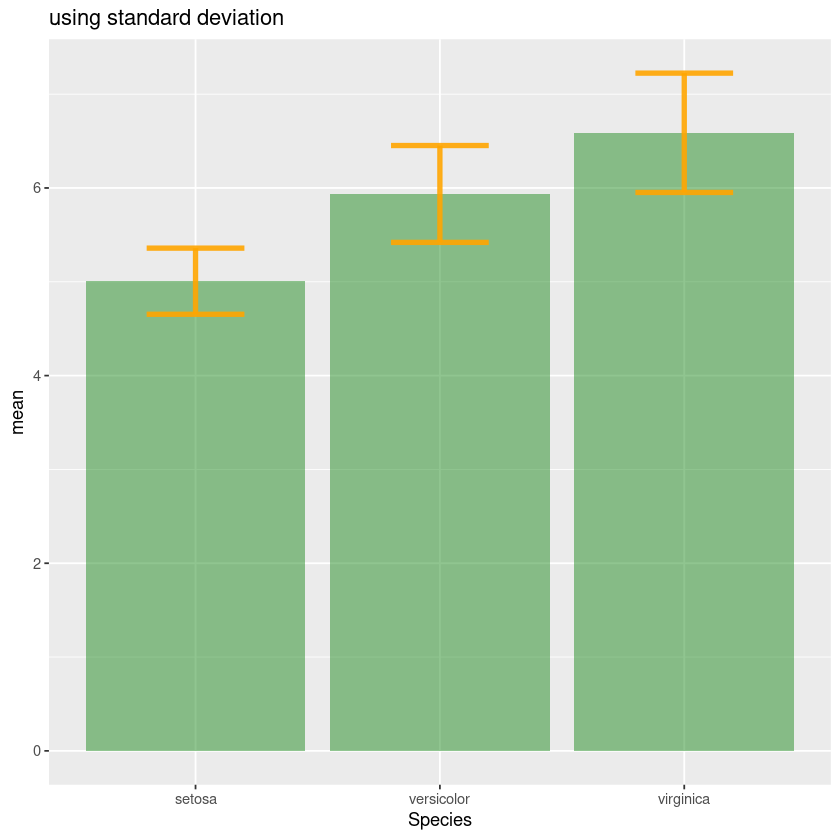

In [220]:
# using ggplot to add error bars to bar plots

# using standard deviation as an error measurement
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sd, ymax=mean+sd), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard deviation")

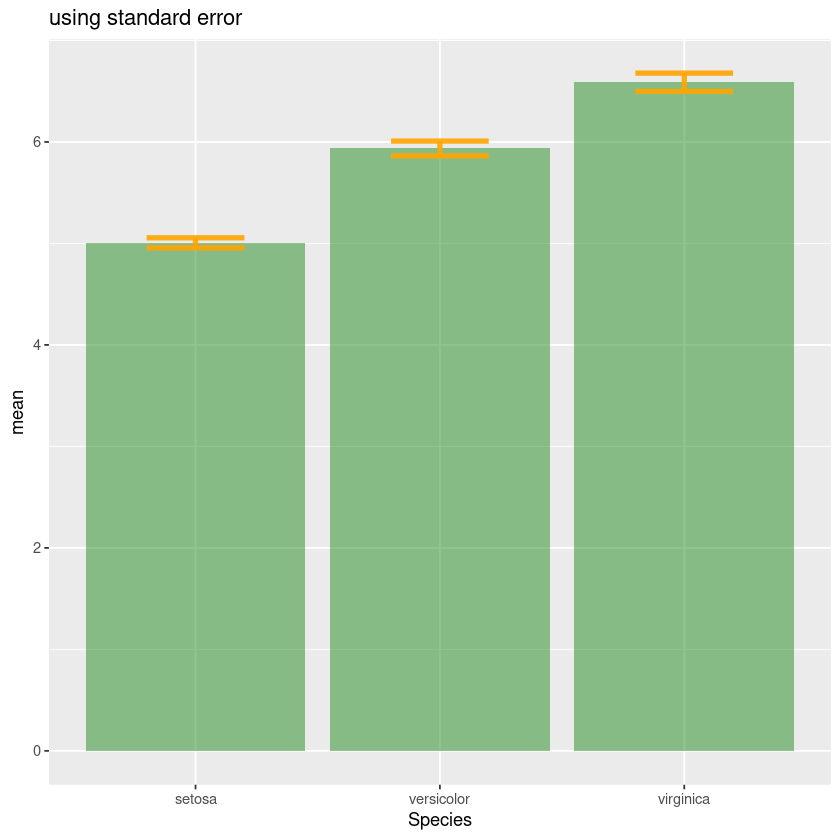

In [222]:
# using standard error as an error measurement
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sem, ymax=mean+sem), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard error")